In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
%config InlineBackend.print_figure_kwargs = {'dpi': 110, 'bbox_inches': 'tight'}

In [3]:
precipitation = pd.read_csv("rain/rain.txt", decimal=",", sep=";", header=None, skiprows=1).reset_index()
precipitation.columns = ["date", "rain"]
precipitation['date'] = pd.date_range(start=start_date, periods=len(precipitation), freq="5min")

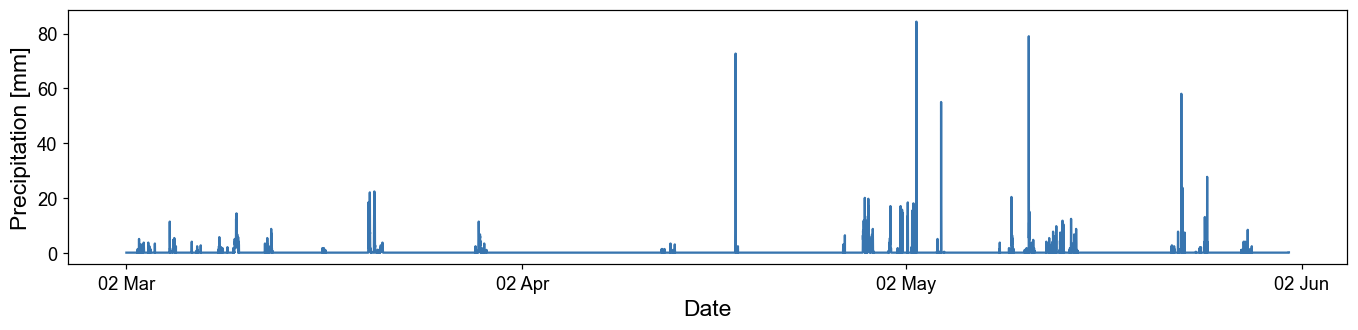

In [4]:
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)   
plt.plot(precipitation["date"], precipitation["rain"], color=blue)
plt.ylabel("Precipitation [mm]")
plt.xlabel("Date")

two_weeks = mdates.DayLocator(interval=14)
formatter = mdates.DateFormatter("%d %b")

ax.xaxis.set_major_formatter(formatter)
second_of_month = mdates.DayLocator(bymonthday=2)

ax.xaxis.set_major_locator(second_of_month)
plt.savefig(f"../plots/precipitation.png", bbox_inches="tight", dpi=300)

12 days 00:00:00


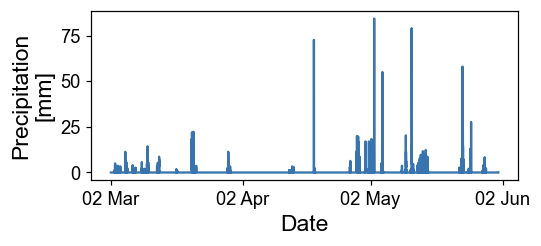

In [44]:
fig, ax = plt.subplots(figsize=(5, 2), dpi=300)
precipitation_sub = precipitation
precipitation_sub = precipitation_sub
plt.plot(precipitation_sub["date"], precipitation_sub["rain"], color=blue)
plt.ylabel("Precipitation\n[mm]")
plt.xlabel("Date")
formatter = mdates.DateFormatter("%d %b")
ax.xaxis.set_major_formatter(formatter)
second_of_month = mdates.DayLocator(bymonthday=2)
ax.xaxis.set_major_locator(second_of_month)

print(pd.Timestamp("2020-04-12") - pd.Timestamp("2020-03-31"))

12 days 00:00:00


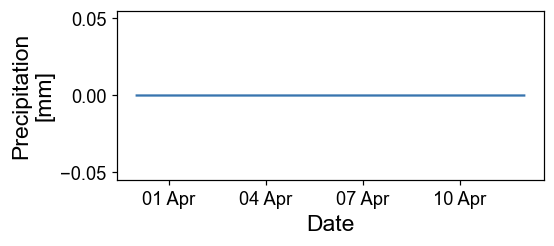

In [40]:
fig, ax = plt.subplots(figsize=(5, 2), dpi=300)
precipitation_sub = precipitation.loc[precipitation.date >= "2020-03-31"]
precipitation_sub = precipitation_sub.loc[precipitation_sub.date <= "2020-04-12"]
plt.plot(precipitation_sub["date"], precipitation_sub["rain"], color=blue)
plt.ylabel("Precipitation\n[mm]")
plt.xlabel("Date")
formatter = mdates.DateFormatter("%d %b")
ax.xaxis.set_major_formatter(formatter)
second_of_month = mdates.DayLocator(interval=3)
ax.xaxis.set_major_locator(second_of_month)

print(pd.Timestamp("2020-04-12") - pd.Timestamp("2020-03-31"))

In [28]:
pd.Timestamp("2020-04-28") - pd.Timestamp("2020-05-05")

Timedelta('-7 days +00:00:00')

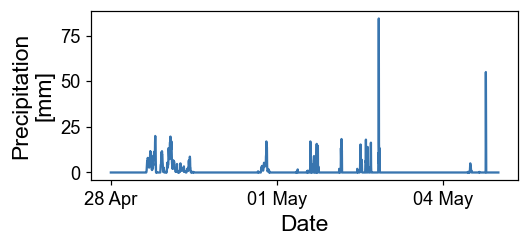

In [41]:
fig, ax = plt.subplots(figsize=(5, 2), dpi=300)
precipitation_sub = precipitation.loc[precipitation.date >= "2020-04-28"]
precipitation_sub = precipitation_sub.loc[precipitation_sub.date <= "2020-05-05"]
plt.plot(precipitation_sub["date"], precipitation_sub["rain"], color=blue)
plt.ylabel("Precipitation\n[mm]")
plt.xlabel("Date")
formatter = mdates.DateFormatter("%d %b")
ax.xaxis.set_major_formatter(formatter)
second_of_month = mdates.DayLocator(interval=3)
ax.xaxis.set_major_locator(second_of_month)

In [3]:
experiment_series ="pop8"
decay_setting = "no_decay"

memilio_id = 1

plot_path = f"../plots/{experiment_series}/concentration"
os.makedirs(plot_path, exist_ok=True)

In [ ]:
# Load the data
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}"

df_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_Rain_output.csv")
df_rain = df_rain.loc[df_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_rain["time_in_minutes"], unit="min")

df_no_rain = pd.read_csv(f"{result_path}/substances/{decay_setting}_noRain_output.csv")
df_no_rain = df_no_rain.loc[df_no_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_no_rain["time_in_minutes"], unit="min")

df_measurements = pd.read_csv(f"{result_path}/../concentration_measurements.csv")




In [5]:
# N_D
manhole = "MUC562"

df_flow_rates_rain = pd.read_csv(f"{result_path}/hydraulics/{decay_setting}_Rain_output.csv")
df_flow_rates_rain = df_flow_rates_rain.loc[df_flow_rates_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_flow_rates_no_rain = pd.read_csv(f"{result_path}/hydraulics/{decay_setting}_noRain_output.csv")
df_flow_rates_no_rain = df_flow_rates_no_rain.loc[df_flow_rates_no_rain.simulation_id == memilio_id].drop(columns=["simulation_id"])



In [6]:
df_flow_rates_rain = df_flow_rates_rain.loc[df_flow_rates_rain["pipe_number"]==manhole]
df_flow_rates_no_rain = df_flow_rates_no_rain.loc[df_flow_rates_no_rain["pipe_number"]==manhole]

df_flow_rates_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_rain["time_in_minutes"], unit="min")
df_flow_rates_no_rain["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_flow_rates_no_rain["time_in_minutes"], unit="min")

In [13]:
def visualize_precipitation_effect(manhole, max_date="2022-04-01"):
    df_rain_sub = df_rain[(df_rain["variable"] == "COV19") & (df_rain["manhole"]==manhole)].copy()
    df_rain_sub = df_rain_sub[df_rain_sub["Date"] < max_date]
    df_rain_sub["location"] = df_rain_sub["manhole"].map(manhole_names)

    df_no_rain_sub = df_no_rain[(df_no_rain["variable"] == "COV19") & (df_no_rain["manhole"]==manhole)].copy()
    df_no_rain_sub = df_no_rain_sub[df_no_rain_sub["Date"] < max_date]
    df_no_rain_sub["location"] = df_no_rain_sub["manhole"].map(manhole_names)

    precipitation_sub = precipitation[precipitation["date"] < max_date].copy()
    flow_rates_rain_sub = df_flow_rates_rain[df_flow_rates_rain["Date"] < max_date]
    flow_rates_no_rain_sub = df_flow_rates_no_rain[df_flow_rates_no_rain["Date"] < max_date]


    high_rain_dates = precipitation_sub[precipitation_sub["rain"] > 10]["date"]

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5.2, 5.17), sharex=True, dpi=300)

    # Add vertical dashed lines to all subplots
    for ax in axes:
        for date in high_rain_dates:
            ax.axvline(x=date, color=medium_grey, linestyle='--', linewidth=0.8, alpha=0.9)

    axes[0].plot(precipitation_sub["date"], precipitation_sub["rain"], color=blue)
    axes[0].plot(precipitation_sub["date"], np.repeat(0.0, precipitation_sub.shape[0]), color=tan)
    axes[1].plot(df_rain_sub["Date"], df_rain_sub["value"], color=blue, label="Precipitation")
    axes[1].plot(df_no_rain_sub["Date"], df_no_rain_sub["value"], color=tan, label="No precipitation")

    axes[2].plot(flow_rates_rain_sub["Date"][850:], flow_rates_rain_sub["value"][850:], color=blue, label="Precipitation")
    axes[2].plot(flow_rates_no_rain_sub["Date"][850:], flow_rates_no_rain_sub["value"][850:], color=tan, label="No precipitation")
    axes[2].set_ylabel("Flow rate\n[l/s]")
    axes[2].set_yscale('log')

    #axes[2].scatter(df_measurements_sub["Date"], df_measurements_sub["Value"], color="goldenrod", zorder=10)
    two_weeks = mdates.DayLocator(interval=7)
    formatter = mdates.DateFormatter("%d %b")

    for ax in axes:
        ax.xaxis.set_major_locator(two_weeks)
        ax.xaxis.set_major_formatter(formatter)
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    axes[1].set_ylabel("Virus levels\n[copies/l]")
    axes[0].set_ylabel("Precipitation\n[mm]")
    #axes[1].legend()


    plt.tight_layout()
    return fig

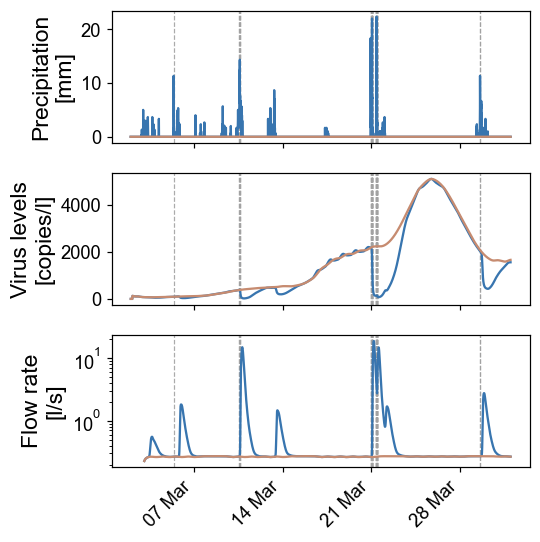

In [14]:
fig = visualize_precipitation_effect(manhole, max_date="2020-04-01")
fig.savefig(f"{plot_path}/precipitation_effect_{manhole}.png", bbox_inches="tight", dpi=300)